## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer hear

Assume $h_j(x) = W_j * x + b, j\in\{0,1,2\}$, $x$ is a sample, define loss function be
$$
J = \max(0,   \max_j h_j(x)-h_{y}(x)) \quad \text{where}\quad j\ne y
$$
$y$ is the label of x.   
Assume that $s = \arg\max_j h_j(x)$, then
$$
\frac{\partial J}{\partial W_{j}} = 
	\begin{cases}
		-x & : j = y \ne s\\
		x  & : j = s \ne y \\
		0  & : \text{otherwise}
	\end{cases}  
$$	
thus, the update rule is:   
if $\max{W_j*x} > W_y*x$, $s = \arg\min_j W_j*x$ and $\eta$ is the learning rate,   
then 
$$
\begin{align*}
	W_y' & = W_y + \eta*x \\
	W_s' & = W_s - \eta*x
\end{align*}
$$
There is no need to update $b$
#################################
                              
                        

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [4]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [21]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        #########################################
        weight = 0.01*np.mean(self.sample_std) * np.random.randn(weight_dimension, num_cls)

        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        labels = [0,1,2]
        for i in range(X_train.shape[0]):
            y_k = y_train[i]; x_k = X_train[i]
            scores = x_k @ self.weight
            s = np.argmax(scores)
            if s == y_k:
                pass
            else:
                self.weight[:,y_k] += self.lr* x_k
                self.weight[:,s] -= self.lr*x_k                
        #caculate the acc
        scores_mat = X_train @ self.weight
        y_train_pred = np.argmax(scores_mat, axis = 1)
        train_acc = np.mean(y_train_pred == y_train)
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        scores_mat = X_test @ self.weight
        y_test_pred = np.argmax(scores_mat, axis = 1)
        test_acc = np.mean(y_test_pred == y_test)        
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
         
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

In [22]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches



epoch: 0 traing_acc:0.790 tst_acc:0.667
epoch: 1 traing_acc:0.829 tst_acc:0.822
epoch: 2 traing_acc:0.848 tst_acc:0.778
epoch: 3 traing_acc:0.733 tst_acc:0.800
epoch: 4 traing_acc:0.848 tst_acc:0.800
epoch: 5 traing_acc:0.838 tst_acc:0.711
epoch: 6 traing_acc:0.867 tst_acc:0.822
epoch: 7 traing_acc:0.848 tst_acc:0.733
epoch: 8 traing_acc:0.848 tst_acc:0.711
epoch: 9 traing_acc:0.819 tst_acc:0.822


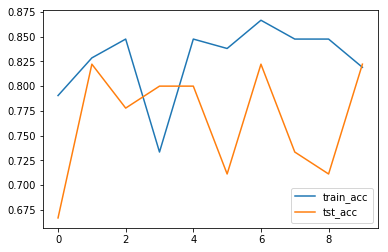

In [28]:
lr = 1e-1; num_epoch = 10; weight_dimension = X_train.shape[1]; num_cls = np.unique(y).size

model = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)
model.train()
model.vis_acc_curve()